# STAT207 Final Project - What do People like about Music: An Statistical Analysis on Spotify Top 200 Charts

Author: Bryant Hsiung (whsiung3)

## 1. Introduction

### 1.1 Motivation 

In today's world, everyone listens to music. And according to Drive Research, Spotify is the No.1 music streaming service, with over 210 million paid subscribers and 515 million monthly active users around the world. Therefore, its data has more credibility compared to other music platforms such as Apple Music and YouTube Music. Moreover, by studying this dataset, we can know what were some popular songs in 2020 & 2021 globally. For most people, these songs should be familiar and therefore it is also interesting to learn what made them so famous during the time. 


Source: https://www.driveresearch.com/market-research-company-blog/music-streaming-statistics/

### 1.2 Research Questions
1. What makes a song popular? It would be interested to know the music trends in 2020 and 2021. People could use the answers to make music that is more likely to gain popularity in the future. Is there a linear relationship between popularity and other features of a song?
---
2. What genres are the most popular? For that specific genre, is there a linear relationship between the log-odds of being that genre and other factors such as popularity, danceability, energy and loudness.
---
3. What is the relationship between being genre and popularity in the dataset? Does being in dance-pop genre make a song more likely to be popular?

In [62]:
# Imports here
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

### 1.3 Dataset 
The dataset has 500 rows and 41 columns.

In [2]:
# Display the first 10 observations
df = pd.read_csv("spotify_top_200_sample.csv", na_values = ["missing"])
df.head(10)

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563.0,...,r&b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999.0,...,dance pop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614.0,...,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273.0,...,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805.0,...,philly rap,rap,trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,109,1,2/21/2020,2020,2,21,Interlude : Shadow,6655856,BTS,37151476.0,...,k-pop boy group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,135,15,8/28/2020,2020,8,28,El Mismo Aire - con Pablo Alborán,4705484,Camilo,10580764.0,...,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,47,1,6/25/2021,2021,6,25,LEMONHEAD (feat. 42 Dugg),11380679,"Tyler, The Creator",6777818.0,...,rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,76,17,6/26/2020,2020,6,26,Tak Tiki Tak,4761286,Harry Nach,134339.0,...,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,129,1,1/24/2020,2020,1,24,Donuts,6113037,Gzuz,1140383.0,...,german hip hop,hamburg hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(500, 41)

### 1.4 Critical Thinking
Some of the limitations include that this dataset only contains data from 2021 to 2022. Also, since more people listen to English songs (compared to other languages), there might be some biases in favor of English songs. In addition, although Spotiy is perhaps the most used music platform, we don't know for sure it's comprehensive. There aren't any ethical considerations for this data, under the assumption that its acquisition is ethical and legal.

## 2. Linear Regression and Feature Selection

We will start building a model with variables that we think contribute to the popularity of the song. Then we will use a Backwards Elimation Algoirthm to try to reduce the number of variables needed in the model. 

Response: Popularity

Predictors: Artist Followers, Danceability, Acousticeness, Energy, Liveness, Loudness, Speechiness, Tempo and Valence.

In [4]:
# Select columns needed 
X = df[["Genre_1", "Popularity", "Artist_Followers", "Danceability", "Acousticness", "Energy", "Liveness", \
        "Loudness", "Speechiness", "Tempo", "Valence"]]

# Drop rows that have NA values
X = X.dropna()

# Drop missing values
X.shape

(474, 11)

In [5]:
# Make sure there's no NaN values
print(X.isnull().sum())

Genre_1             0
Popularity          0
Artist_Followers    0
Danceability        0
Acousticness        0
Energy              0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Valence             0
dtype: int64


In [6]:
X.columns

Index(['Genre_1', 'Popularity', 'Artist_Followers', 'Danceability',
       'Acousticness', 'Energy', 'Liveness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence'],
      dtype='object')

In [7]:
# Make sure all variables are in floats
X.dtypes

Genre_1              object
Popularity          float64
Artist_Followers    float64
Danceability        float64
Acousticness        float64
Energy              float64
Liveness            float64
Loudness            float64
Speechiness         float64
Tempo               float64
Valence             float64
dtype: object

In [8]:
# Full Model
model_1 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + Energy + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_1.rsquared_adj

0.049859157132571386

In [9]:
# Remove Artist_Followers
model_2 = smf.ols("Popularity ~ Danceability + Acousticness + Energy + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_2.rsquared_adj

0.03573980567507684

In [10]:
# Remove Danceability 
model_3 = smf.ols("Popularity ~ Artist_Followers + Acousticness + Energy + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_3.rsquared_adj

0.050071092286331886

In [11]:
# Remove Acousticness
model_4 = smf.ols("Popularity ~ Artist_Followers + Danceability + Energy + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_4.rsquared_adj

0.049418509826686274

In [12]:
# Remove Energy
model_5 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_5.rsquared_adj

0.05052998775011708

In [13]:
# Remove Liveness
model_6 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + Energy + \
                   Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_6.rsquared_adj

0.04599277311834926

In [14]:
# Remove Speechiness
model_7 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + Energy + \
                  Liveness + Tempo + Valence", data = df).fit()

model_7.rsquared_adj

0.046738268146360396

In [15]:
# Remove Tempo
model_8 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + Energy + \
                  Liveness + Loudness + Speechiness + Valence", data = df).fit()

model_8.rsquared_adj

0.04643651791971759

In [16]:
# Remove Valence
model_9 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + Energy + \
                  Liveness + Loudness + Speechiness + Tempo", data = df).fit()

model_9.rsquared_adj

0.04969480899001566

In [17]:
# From the second round results above, we will continue the process with model_5
# Adjusted R-squared: 0.05052998775011708

In [18]:
# Remove Artist_Followers
model_5_1 = smf.ols("Popularity ~ Danceability + Acousticness + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_5_1.rsquared_adj

0.03676675940269414

In [19]:
# Remove Danceability
model_5_2 = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_5_2.rsquared_adj

0.051315607028473376

In [20]:
# Remove Acousticness
model_5_3 = smf.ols("Popularity ~ Artist_Followers + Danceability + \
                  Liveness + Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_5_3.rsquared_adj

0.04782223486870252

In [21]:
# Remove Liveness
model_5_4 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Loudness + Speechiness + Tempo + Valence", data = df).fit()

model_5_4.rsquared_adj

0.04718256831727996

In [22]:
# Remove Loudness 
model_5_5 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Speechiness + Tempo + Valence", data = df).fit()

model_5_5.rsquared_adj

0.03896047659877855

In [23]:
# Remove Speechiness
model_5_6 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

model_5_6.rsquared_adj

0.051494421530382084

In [24]:
# Remove Tempo
model_5_7 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Loudness + Speechiness + Valence", data = df).fit()

model_5_7.rsquared_adj

0.04712526632145542

In [25]:
# Remove Valence 
model_5_8 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Loudness + Speechiness + Tempo", data = df).fit()

model_5_8.rsquared_adj

0.05110438154185226

In [26]:
# From the second round results above, we will continue the process with model_5_6
# Adjusted R-squared: 0.051494421530382084

In [27]:
# Remove Artist_Followers
model_5_6_1 = smf.ols("Popularity ~ Danceability + Acousticness + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

model_5_6_1.rsquared_adj

0.03682998511109192

In [28]:
# Remove Danceability
model_5_6_2 = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

model_5_6_2.rsquared_adj

0.052666350277003615

In [29]:
# Remove Acousticness
model_5_6_3 = smf.ols("Popularity ~ Artist_Followers + Danceability + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

model_5_6_3.rsquared_adj

0.04925332248256087

In [30]:
# Remove Liveness
model_5_6_4 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Loudness + Tempo + Valence", data = df).fit()

model_5_6_4.rsquared_adj

0.04735009491986919

In [31]:
# Remove Loudness
model_5_6_5 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Tempo + Valence", data = df).fit()

model_5_6_5.rsquared_adj

0.03850822075265847

In [32]:
# Remove Tempo
model_5_6_6 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Loudness + Valence", data = df).fit()

model_5_6_6.rsquared_adj

0.047184919962992566

In [33]:
# Remove Valence
model_5_6_7 = smf.ols("Popularity ~ Artist_Followers + Danceability + Acousticness + \
                  Liveness + Loudness + Tempo", data = df).fit()

model_5_6_7.rsquared_adj

0.0520958918250497

In [34]:
# From the second round results above, we will continue the process with model_5_6_2
# Adjusted R-squared: 0.052666350277003615

In [35]:
# Remove Artist_Followers
model_5_6_2_1 = smf.ols("Popularity ~ Acousticness + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

model_5_6_2_1.rsquared_adj

0.03826424192628142

In [36]:
# Remove Acousticness
model_5_6_2_2 = smf.ols("Popularity ~ Artist_Followers + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

model_5_6_2_2.rsquared_adj

0.0483541244099458

In [37]:
# Remove Liveness
model_5_6_2_3 = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Loudness + Tempo + Valence", data = df).fit()

model_5_6_2_3.rsquared_adj

0.047799587152311696

In [38]:
# Remove Loudness
model_5_6_2_4 = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Liveness + Tempo + Valence", data = df).fit()

model_5_6_2_4.rsquared_adj

0.04010601603630537

In [39]:
# Remove Tempo
model_5_6_2_5 = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Liveness + Valence", data = df).fit()

model_5_6_2_5.rsquared_adj

0.03642421576496446

In [40]:
# Remove Valence
model_5_6_2_6 = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Liveness + Tempo", data = df).fit()

model_5_6_2_6.rsquared_adj

0.04203825284160101

In [41]:
# From the third round results above, we still stop with model_5_6_2 because the adjusted R-squared did not
# go up after deletion of any predictor variable.

In [42]:
# Final (Parsimonious) Model
final_model = smf.ols("Popularity ~ Artist_Followers + Acousticness + \
                  Liveness + Loudness + Tempo + Valence", data = df).fit()

# Show the summary
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.587
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.28e-05
Time:                        11:19:50   Log-Likelihood:                -2033.7
No. Observations:                 496   AIC:                             4081.
Df Residuals:                     489   BIC:                             4111.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           82.6694      4.117     20.082      0.000      74.581      90.758
Artist_Followers  1.115e-07   3.84e-08      2.907      0.004    3.61e-08    1.87e-07
Acousticness        -5.2290      2.909     -1.797      0.073     -10.945       0.487
Liveness            -8.7636      4.673     -1.875      0.061     -17.945       0.418
Loudness             0.8333      0.304      2.738      0.006       0.235       1.431
Tempo               -0.0426      0.023     -1.865      0.063      -0.087       0.002
Valence             -1.9385      2.985     -0.650      0.516      -7.803       3.926
==============================================================================
Omnibus:                      273.075   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2066.088
Skew:                          -2.322   Prob(JB):                         0.00
Kurtosis:                      11.855   Cond. No.                     1.79e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

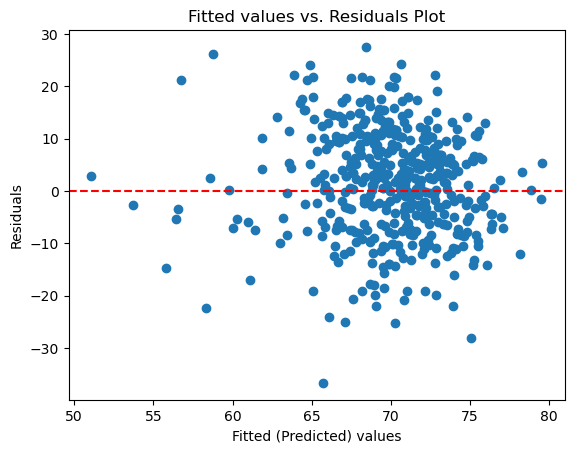

In [43]:
# Linearity Condition
y_pred = final_model.predict(X[["Artist_Followers", "Acousticness", "Liveness", "Loudness", "Tempo", "Valence"]])
residuals = X["Popularity"] - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

In [44]:
# Make at least one prediction 
temp = {"Artist_Followers" : [1000000], "Acousticness" : [0.5], "Liveness" : [0.5], "Loudness" : [0.5], 
        "Tempo" : [0.5], "Valence" : [0.5]}
temp = pd.DataFrame(temp)

final_model.predict(temp)

0    75.210795
dtype: float64

### Some Questions to Answer
1. Summary output: See above.


2. Linear Regression Equation: ```yhat = 82.6694 + 1.115e-07 * Artist_Followers - 5.229 * Acousticness - 8.7637 * Liveness + 0.8333 * Loudness - 0.0426 * Tempo - 1.9385 * Valence.```


3. Linearity Condition: There seems to be a roughly even distribution of negative and positive points. Therefore, this implies that there is a linear relationship between the response variable (popularity) and the chosen explanatory variables (artist followers, acousticness, liveness, loudness, tempo, and valence).


4. We used backward elimination as our feature selection to build a parsimonious model. We chose this technique because we cannot try all possible combinations $\approx 2^{9}$. Our final set of predictors are artist followers, acousticness, liveness, loudness, tempo, and valence. 


5. For each increase of the artist follower, the predicted expected popularity of a song will increase by 1.115e-07, on average, holding other variables, acousticness, liveness, loudness, tempo, and valence constant.


6. Approx. 6.4% of the variability in the popularity of a song can be explained by its linear relationship with the artist followers, acousticness, liveness, loudness, tempo, and valence. The $R^2$ is relatively low.


7. Make a prediction (code above): For a song that its artist has 100,0000 followers, and its acousticness, liveness, loudness, tempo and valence are all 0.5, the predicted expected popularity of the song is 75.2108, on average.


8. To answer our research question, we first can see that the more popular the artist is, the more popular his/her songs are. Then, we can see that the overall loudness of a song tends to increase the popularity as well. On the other hand, factors such as acousticness, liveness, tempo and valence contribute negatively to the popularity of a song, with acousticness and liveness being the two biggest factors.

## 3. Logistic Regression and Classification

Response: Whether a song is dance pop.


Predictor variables: Popularity, Danceability, Energy and Loudness

In [45]:
X.head()

,Genre_1,Popularity,Artist_Followers,Danceability,Acousticness,Energy,Liveness,Loudness,Speechiness,Tempo,Valence
0,pop,87.0,1398563.0,0.449,0.524,0.465,0.303,-8.964,0.079,89.087,0.543
1,boy band,70.0,5436999.0,0.715,0.049,0.827,0.321,-5.090,0.062,117.977,0.750
2,pop,52.0,42227614.0,0.598,0.060,0.680,0.324,-4.505,0.033,134.002,0.437
3,latin,82.0,36142273.0,0.811,0.234,0.637,0.118,-4.835,0.059,92.025,0.471
4,melodic rap,67.0,11821805.0,0.881,0.033,0.457,0.231,-8.191,0.156,136.970,0.296


In [46]:
# Convert Genre_1 to 0/1 values
X["is_dance_pop"] = X["Genre_1"].apply(lambda x: 1 if x == "dance pop" else 0)

# Make sure it actually works
X[X["Genre_1"] == "dance pop"].head()

,Genre_1,Popularity,Artist_Followers,Danceability,Acousticness,Energy,Liveness,Loudness,Speechiness,Tempo,Valence,is_dance_pop
27,dance pop,75.0,1304510.0,0.740,0.025,0.576,0.104,-6.744,0.146,110.095,0.315,1
38,dance pop,58.0,18585963.0,0.668,0.024,0.826,0.474,-4.466,0.038,122.973,0.388,1
41,dance pop,63.0,67208170.0,0.499,0.801,0.462,0.095,-5.308,0.031,127.698,0.599,1
42,dance pop,92.0,32574754.0,0.586,0.182,0.616,0.093,-7.964,0.032,148.088,0.719,1
47,dance pop,49.0,28931149.0,0.691,0.484,0.446,0.183,-10.304,0.047,93.030,0.534,1


In [47]:
# Split the dataset into training (0.7) and testing (0.3) dataset 

X_train, X_test = train_test_split(X, test_size = 0.3, random_state = 207)

In [48]:
# Make sure the sizes are correct
print(len(X))
print(len(X_train))
print(len(X_test))

474
331
143


In [49]:
print(X_train.isnull().sum())

Genre_1             0
Popularity          0
Artist_Followers    0
Danceability        0
Acousticness        0
Energy              0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Valence             0
is_dance_pop        0
dtype: int64


In [50]:
print(X_test.isnull().sum())

Genre_1             0
Popularity          0
Artist_Followers    0
Danceability        0
Acousticness        0
Energy              0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Valence             0
is_dance_pop        0
dtype: int64


In [51]:
# Fit a logistic regression model
log_mod = smf.logit("is_dance_pop ~ Popularity + Danceability + Energy + Loudness", data = X_train).fit()

# Show the summary
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.441758
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           is_dance_pop   No. Observations:                  331
Model:                          Logit   Df Residuals:                      326
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                 0.03833
Time:                        11:19:50   Log-Likelihood:                -146.22
converged:                       True   LL-Null:                       -152.05
Covariance Type:            nonrobust   LLR p-value:                   0.02010
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0837      2.166     -0.500      0.617      -5.329       3.161
Popularity       0.0152      0.016      0.952      0.341      -0.016       0.046
Danceability    -1.0033      1.094     -0.917      0.359      -3.147       1.140
Energy           0.3947      1.450      0.272      0.785      -2.447       3.236
Loudness         0.1928      0.108      1.785      0.074      -0.019       0.405
================================================================================
"""

In [52]:
# ROC Curve
X_train["predictive_prob"] = log_mod.predict(X_train)
fprs, tprs, thresholds = roc_curve(y_true = X_train["is_dance_pop"], y_score = X_train["predictive_prob"])
X_train.head()

,Genre_1,Popularity,Artist_Followers,Danceability,Acousticness,Energy,Liveness,Loudness,Speechiness,Tempo,Valence,is_dance_pop,predictive_prob
277,atl hip hop,73.0,9949044.0,0.825,0.349,0.733,0.112,-5.625,0.097,97.974,0.620,0,0.167935
347,pop,68.0,19345579.0,0.764,0.082,0.887,0.847,-3.726,0.074,118.427,0.720,0,0.233623
211,florida rap,70.0,2203386.0,0.733,0.051,0.389,0.141,-8.468,0.074,157.878,0.244,0,0.096437
30,brooklyn drill,70.0,6852509.0,0.764,0.389,0.676,0.215,-6.761,0.093,97.020,0.461,0,0.138698
415,canadian hip hop,80.0,3828418.0,0.904,0.063,0.723,0.185,-5.224,0.260,145.013,0.835,0,0.182407


In [53]:
# AUC
auc = roc_auc_score(y_true = X_train["is_dance_pop"], y_score = X_train["predictive_prob"])
auc

0.6523882699449353

In [54]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")
    plt.show()

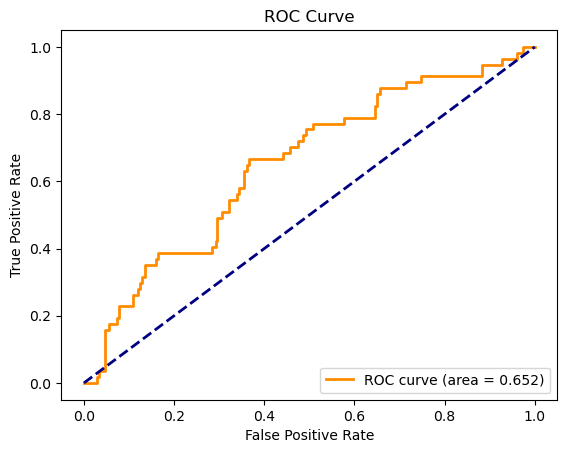

In [55]:
plot_roc(fprs, tprs, auc)

In [56]:
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    
    return pd.DataFrame({"Threshold": [thresh],
                         "fpr": [fpr],
                         "tpr": [tpr]})

for thresh in np.arange(0,1.01,.01):
    print(fpr_tpr_thresh(X_train['is_dance_pop'], X_train['predictive_prob'], thresh))

   Threshold  fpr  tpr
0        0.0  1.0  1.0
   Threshold      fpr  tpr
0       0.01  0.99635  1.0
   Threshold       fpr  tpr
0       0.02  0.985401  1.0
   Threshold       fpr  tpr
0       0.03  0.981752  1.0
   Threshold       fpr  tpr
0       0.04  0.974453  1.0
   Threshold       fpr  tpr
0       0.05  0.974453  1.0
   Threshold       fpr       tpr
0       0.06  0.963504  0.982456
   Threshold       fpr       tpr
0       0.07  0.937956  0.964912
   Threshold       fpr       tpr
0       0.08  0.927007  0.964912
   Threshold       fpr       tpr
0       0.09  0.883212  0.947368
   Threshold       fpr       tpr
0        0.1  0.832117  0.912281
   Threshold       fpr       tpr
0       0.11  0.777372  0.912281
   Threshold       fpr       tpr
0       0.12  0.737226  0.894737
   Threshold       fpr       tpr
0       0.13  0.656934  0.877193
   Threshold       fpr       tpr
0       0.14  0.613139  0.789474
   Threshold       fpr      tpr
0       0.15  0.540146  0.77193
   Threshold      

In [57]:
fpr_tpr_thresh(X_train['is_dance_pop'], X_train['predictive_prob'], 0.19)

,Threshold,fpr,tpr
0,0.19,0.354015,0.631579


In [58]:
# AUC for the test dataset
X_test["predictive_prob"] = log_mod.predict(X_test)
fprs, tprs, thresholds = roc_curve(y_true = X_test["is_dance_pop"], y_score = X_test["predictive_prob"])
auc_test = roc_auc_score(y_true = X_test["is_dance_pop"], y_score = X_test["predictive_prob"])
auc_test

0.6108189331329827

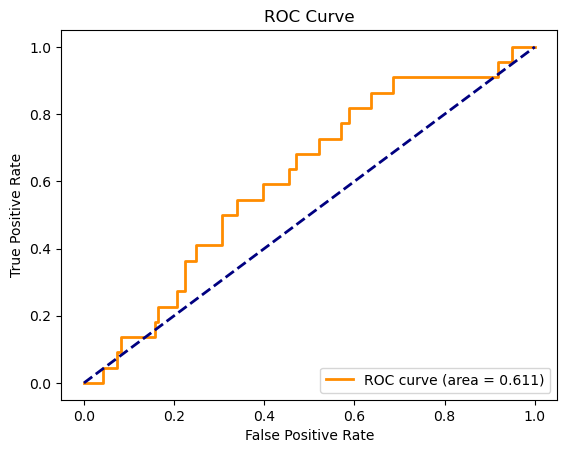

In [59]:
# ROC Curve for the test dataset
plot_roc(fprs, tprs, auc_test)

In [60]:
X_test.head()

,Genre_1,Popularity,Artist_Followers,Danceability,Acousticness,Energy,Liveness,Loudness,Speechiness,Tempo,Valence,is_dance_pop,predictive_prob
186,mariachi,71.0,8123757.0,0.650,0.368,0.558,0.303,-3.082,0.031,141.820,0.725,0,0.262351
374,comic,81.0,1042079.0,0.352,0.733,0.424,0.066,-10.131,0.039,127.047,0.141,0,0.119695
49,dance pop,83.0,11477164.0,0.476,0.060,0.594,0.079,-6.879,0.135,159.702,0.314,1,0.198568
297,latin,71.0,36177712.0,0.761,0.092,0.732,0.072,-5.469,0.055,151.982,0.542,0,0.177009
37,latin,69.0,36177712.0,0.683,0.087,0.677,0.100,-4.496,0.047,156.019,0.514,0,0.210337


In [61]:
# Accuracy rate, sensitivity and specificity 
thresh = 0.19
X_test["yhat"] = 1 * (X_test["predictive_prob"] >= thresh)
CM = confusion_matrix(y_true = X_test["is_dance_pop"], y_pred = X_test["yhat"])

tn, fp, fn, tp = CM.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)

sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)

specificity = tn / (tn + fp)
print("Specificity: ", specificity)

Accuracy:  0.6433566433566433
Sensitivity:  0.5454545454545454
Specificity:  0.6611570247933884


### Some Questions to Answer
1. Model summary: See above 
2. Logistic regression equation: **Log odds of a song being dance pop = -1.0837 + 0.0152 * Popularity - 1.0033 * Danceability + 0.3947 * Energy + 0.1928 * Loudness.**
3. ROC Curve: See above. From the research perspective, we would want to predict whether a given song is dance pop. On the other hand, we won't be penalized too hard for making a wrong decision. A good predictive probability threshold would therefore be 0.19 since we will have a relatively high true positive rate (0.6316), and a relatively low false positive rate (0.3540).
4. The ROC curve of the test data is shown above. The AUC is lower in the test dataset, suggesting issue like overfitting.
5. The classification of the test data has an accuracy of **0.6434**, a sensitivity of **0.5455** and a specificity of **0.6612**.
6. The logistic regression analysis helps predicting whether a given song is dance pop. Considering that dance pop songs are the most common on the list, we could use this kind of classification to predict whether a song will be popular, based on factors like danceability, energy and loudness.

## 4. Descriptive Analytics and Inference

We will first explore the relationship between variables ```Genre``` and ```Popularity``` of a song. Then we will perform a statistics inference to answer more questions regarding to songs in general. More specifically, we will see whether being dance pop actually makes a song more popular.

In [66]:
X["Genre_1"].value_counts()

dance pop            79
latin                45
pop                  33
k-pop                18
atl hip hop          18
                     ..
meme rap              1
chicago soul          1
belgian hip hop       1
argentine hip hop     1
beatlesque            1
Name: Genre_1, Length: 103, dtype: int64

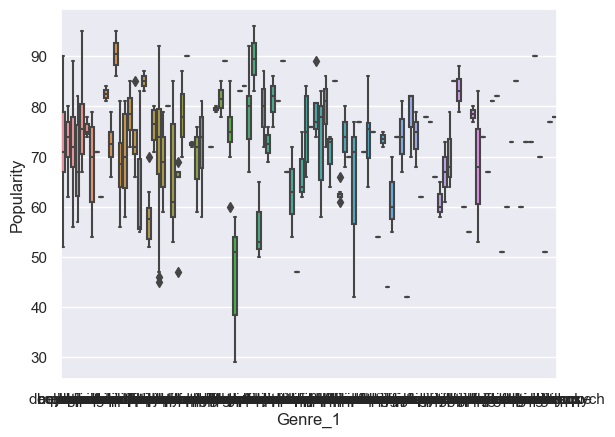

In [64]:
sns.boxplot(x = "Genre_1", y = "Popularity", data = df)
plt.show()

Interpretation: Even though we cannot see the actual genre names, we can see some huge IQR different between different genres. Therefore, we believe there's a strong relationship between genre and popularity. In other words, some genres are more popular than the others. 

**Hypothesis Test**

$\mu_1$ = The mean popularity of dance pop songs


$\mu_2$ = The mean popularity of non-dance pop songs

$H_0: \mu_1 = \mu_2$


$H_A: \mu_2 \neq \mu_2$

In [84]:
pop_dance = X[X["Genre_1"] == "dance pop"]
len(pop_dance)

79

In [85]:
non_pop_dance = X[X["Genre_1"] != "dance pop"]
len(non_pop_dance)

395

In [86]:
len(X)

474

In [101]:
# Our best estimates
mu_1 = pop_dance["Popularity"].mean()
mu_2 = non_pop_dance["Popularity"].mean()

print("Pop dance mean popularity: {}".format(mu_1))
print("Non-pop dance mean popularity: {}".format(mu_2))
print("Difference between two means: {}".format(mu_1 - mu_2))

Pop dance mean popularity: 72.27848101265823
Non-pop dance mean popularity: 71.45822784810126
Difference between two means: 0.8202531645569735


In [83]:
# Statistics Inference
# Difference of popularity mean between dance pop and non dance pop songs
def sampling_distr_diff(df1, df2, var, n1, n2, reps = 5000):
    simulated_statistics = []
    for i in range(reps):
        df_sample1 = df1.sample(n1, replace = True)
        df_sample2 = df2.sample(n2, replace = True)
        simulated_statistics.append(df_sample1[var].mean() - df_sample2[var].mean())
        
    simulated_statistics = pd.DataFrame({"x" : simulated_statistics})
    return simulated_statistics

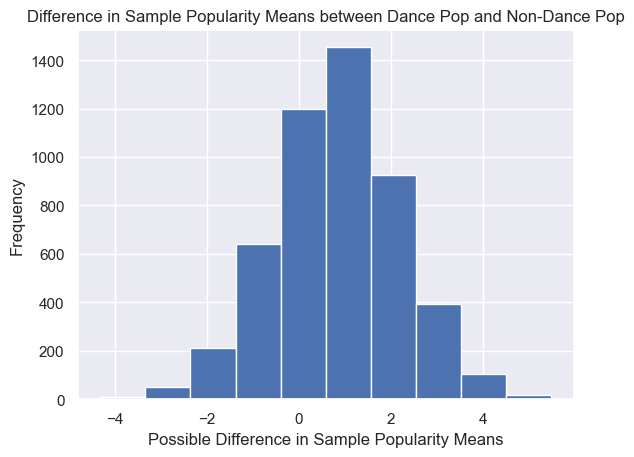

In [88]:
samp_dist = sampling_distr_diff(df1 = pop_dance, df2 = non_pop_dance, var = "Popularity", n1 = 79, n2 = 395)
samp_dist["x"].hist()
plt.xlabel('Possible Difference in Sample Popularity Means')
plt.ylabel('Frequency')
plt.title('Difference in Sample Popularity Means between Dance Pop and Non-Dance Pop')
plt.show()

In [100]:
# Calculate p-value 
diff = mu_1 - mu_2
pval = ((samp_dist["x"] > diff) | (samp_dist["x"] < -diff)).mean()

print("p-value is {}".format(pval))

p-value is 0.6168


Conclusion: Using a 0.05 significance level, we do not have significant evidence to reject the null hypothesis, suggesting that there's no difference between mean of dance pop songs and non-dance pop songs.

### Some Questions to Answer: 
Our research questions are 1) whether there's a relationship between genre and song popularity and 2) does being in the dance-pop genre make a song more popular. From the side-by-side boxplots, we can see that some genres are indeed more popular than the others. However, from the hypothesis testing we performed above, we see that being a dance-pop song does not significantly have a popularity difference.

## 5. Conclusion

### a. Summarization 
Looking back at the three research questions of this project, we first discovered that variables such as artist_followers, acousticness, liveness, loudness, tempo and valence all contribute to the popularity of a song by using a backward elimination algorithm. The actual regression equation is ```$\hat{y}$ = 82.6694 + 1.115e-07 * Artist_Followers - 5.229 * Acousticness - 8.7637 * Liveness + 0.8333 * Loudness - 0.0426 * Tempo - 1.9385 * Valence.``` We also used this model make a simple prediction: a song with 100,0000 followers and 0.5 for all the other predictors would have an estimated popularity of $\approx$75. 

Secondly, we explored that dance pop is the most popular genre of this dataset. And for the specific genre, we saw a linear relationship between the lod-odds of being pop dance and popularity, danceability, energy and loudess. The actual logistic equation is ```Log odds of a song being dance pop = -1.0837 + 0.0152 * Popularity - 1.0033 * Danceability + 0.3947 * Energy + 0.1928 * Loudness.``` 

Last but not least, we looked at the relationship between the song genre and popularity in the dataset. We also found that being in dance-pop genre does not have significant evidence improve popularity, by performing a hypothesis testing with mean difference between two populations.


### b. Limitations
One of the biggest limitations is how low the rsquared values are for the models. For instance, the rsquared value is only 0.06 for the linear regression model. As a result, it is difficult to make strong claims from the model before doing any further analysis. Moreover, since we are not experts in the music industry, it is sometimes hard for us to select the right variables as predictors. Choosing different variables with more knowledge in related field might result in better and more accurate models for this project. One challenge that took us a while to resolve was the missing value in the dataset. We had to convert all missing values into NaN before applying function like ```dropna()```. 


### c. Future work
Before someone else were to conduct future work based on these analyses, they could entail more in-depth questions. For example, for the linear regression analysis, they could potentially build a model that better encapsulates the essense of a popular song. In addition, people could update the dataset with newer data, since it only contains the top 200 songs from 2020-2021 (we are near the end of 2023). In this way, they could compared whether there're any changes in these years.